In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [59]:
df_cap_k = pd.read_csv('./New_drone_performance.csv')

df_cap_k.head()

,delivary_locations,drone_capacity,obstacles,Without_obstacles,Christofides,Christofides_newton,brut_force_distance,brut_force_Newton
0,15,5,13,48.354502,62.069907,60.669695,52.097913,51.657125
1,15,5,13,58.071913,60.722351,60.632495,59.211927,59.149956
2,15,5,13,47.267460,54.284439,50.949433,48.500273,48.754930
3,15,5,13,43.938570,46.359761,45.913186,45.973371,45.414230
4,15,5,13,48.613052,51.244240,52.560552,50.107529,51.303145


In [60]:
df_filtered = df_cap_k[df_cap_k['drone_capacity'] == 5]
df_filtered.tail()

,delivary_locations,drone_capacity,obstacles,Without_obstacles,Christofides,Christofides_newton,brut_force_distance,brut_force_Newton
29,20,5,13,66.134012,73.157220,76.074617,70.239255,70.209476
30,20,5,13,56.899108,65.130062,65.220614,61.914917,61.886299
31,25,5,13,80.453650,91.615503,91.012943,88.335874,87.392525
32,25,5,13,70.766884,77.757650,77.498009,74.392077,73.758081
33,25,5,13,70.306239,76.585232,74.590389,74.002010,73.463676


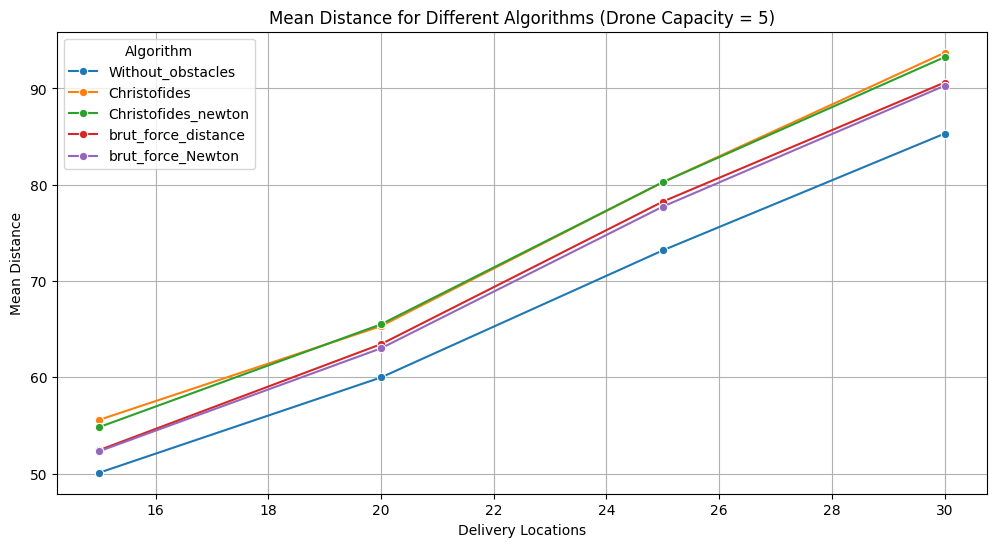

In [61]:
mean_values =df_filtered.groupby('delivary_locations').mean().reset_index()

# Melt the DataFrame to have 'algorithm' and 'distance' columns for plotting
mean_values_melt = pd.melt(mean_values, id_vars=['delivary_locations'], value_vars=['Without_obstacles', 'Christofides', 'Christofides_newton', 'brut_force_distance', 'brut_force_Newton'], var_name='Algorithm', value_name='Distance')

# Plot the line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='delivary_locations', y='Distance', hue='Algorithm', marker='o', data=mean_values_melt)
plt.title('Mean Distance for Different Algorithms (Drone Capacity = 5)')
plt.xlabel('Delivery Locations')
plt.ylabel('Mean Distance')
plt.grid(True)
plt.show()

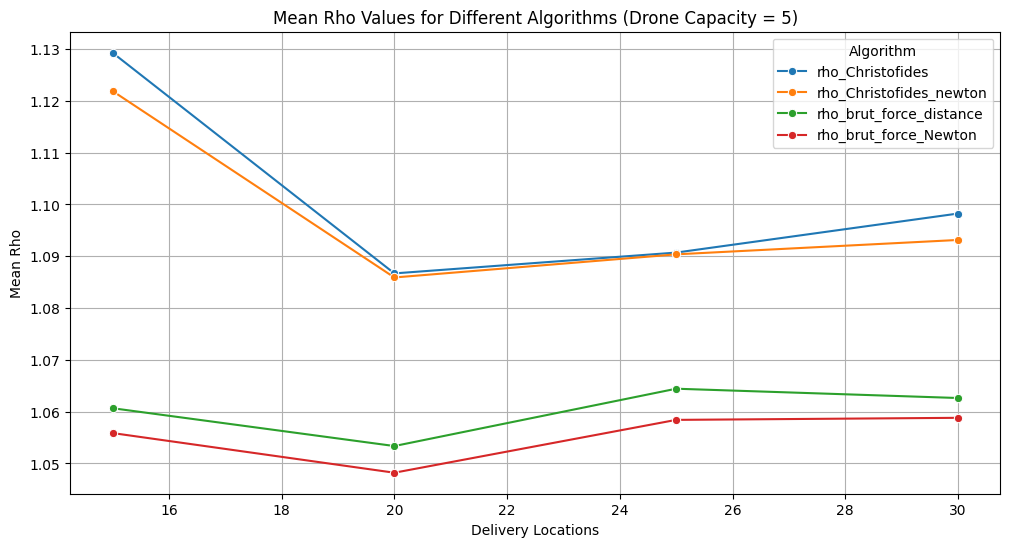

In [62]:
df_filtered['rho_Christofides'] = df_filtered['Christofides'] / df_filtered['Without_obstacles']
df_filtered['rho_Christofides_newton'] = df_filtered['Christofides_newton'] / df_filtered['Without_obstacles']
df_filtered['rho_brut_force_distance'] = df_filtered['brut_force_distance'] / df_filtered['Without_obstacles']
df_filtered['rho_brut_force_Newton'] = df_filtered['brut_force_Newton'] / df_filtered['Without_obstacles']

# Group the data by delivery_locations and calculate the mean
mean_rho = df_filtered.groupby('delivary_locations')[['rho_Christofides', 'rho_Christofides_newton', 'rho_brut_force_distance', 'rho_brut_force_Newton']].mean().reset_index()

# Melt the DataFrame to have 'algorithm' and 'rho' columns for plotting
mean_rho_melt = pd.melt(mean_rho, id_vars=['delivary_locations'], value_vars=['rho_Christofides', 'rho_Christofides_newton', 'rho_brut_force_distance', 'rho_brut_force_Newton'], var_name='Algorithm', value_name='Mean Rho')

# Plot the line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='delivary_locations', y='Mean Rho', hue='Algorithm', marker='o', data=mean_rho_melt)
plt.title('Mean Rho Values for Different Algorithms (Drone Capacity = 5)')
plt.xlabel('Delivery Locations')
plt.ylabel('Mean Rho')
plt.grid(True)
plt.show()

In [63]:
df_filtered_8 = df_cap_k[df_cap_k['drone_capacity'] == 8]
df_filtered_8.tail()

,delivary_locations,drone_capacity,obstacles,Without_obstacles,Christofides,Christofides_newton,brut_force_distance,brut_force_Newton,rho_Christofides,rho_Christofides_newton,rho_brut_force_distance,rho_brut_force_Newton
44,15,8,13,44.505351,54.320347,53.957876,49.487119,48.774986,1.220535,1.212391,1.111936,1.095935
45,15,8,13,48.812387,55.184566,56.111188,53.346894,53.200539,1.130544,1.149528,1.092897,1.089898
46,15,8,13,51.176572,54.472304,56.298956,53.242640,53.055052,1.064399,1.100092,1.040371,1.036706
47,20,8,13,47.793225,52.369739,51.768894,49.094022,49.354305,1.095757,1.083185,1.027217,1.032663
48,20,8,13,58.039482,61.376226,60.439192,60.559416,60.559416,1.057491,1.041346,1.043418,1.043418


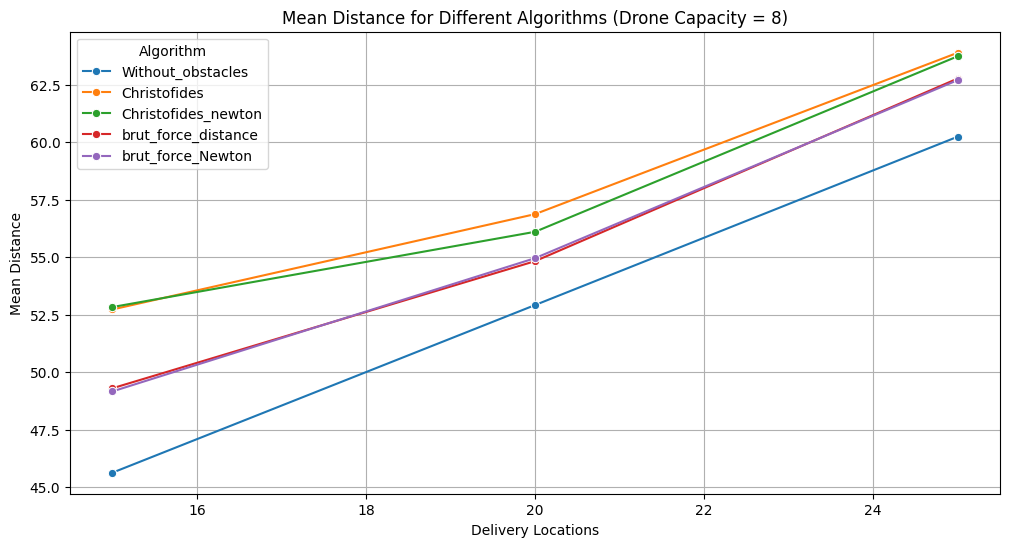

In [64]:
mean_values = df_filtered_8.groupby('delivary_locations').mean().reset_index()

# Melt the DataFrame to have 'algorithm' and 'distance' columns for plotting
mean_values_melt = pd.melt(mean_values, id_vars=['delivary_locations'], value_vars=['Without_obstacles', 'Christofides', 'Christofides_newton', 'brut_force_distance', 'brut_force_Newton'], var_name='Algorithm', value_name='Distance')

# Plot the line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='delivary_locations', y='Distance', hue='Algorithm', marker='o', data=mean_values_melt)
plt.title('Mean Distance for Different Algorithms (Drone Capacity = 8)')
plt.xlabel('Delivery Locations')
plt.ylabel('Mean Distance')
plt.grid(True)
plt.show()